Created by - Sanjana pal

Clustering Task ,I performed this activity using K-means clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns={'Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score','Genre':'Gender'},inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [9]:
df.corr()

,CustomerID,Age,annual_income,spending_score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


In [10]:
df =pd.get_dummies(df,columns=['Gender'])

In [11]:
df

,CustomerID,Age,annual_income,spending_score,Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


<AxesSubplot:>

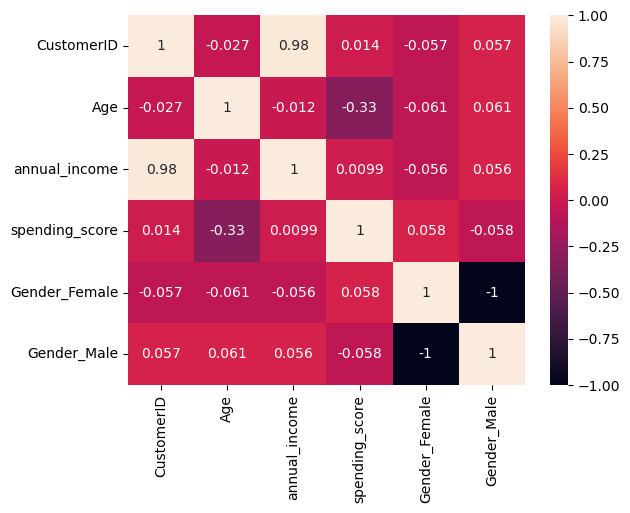

In [12]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

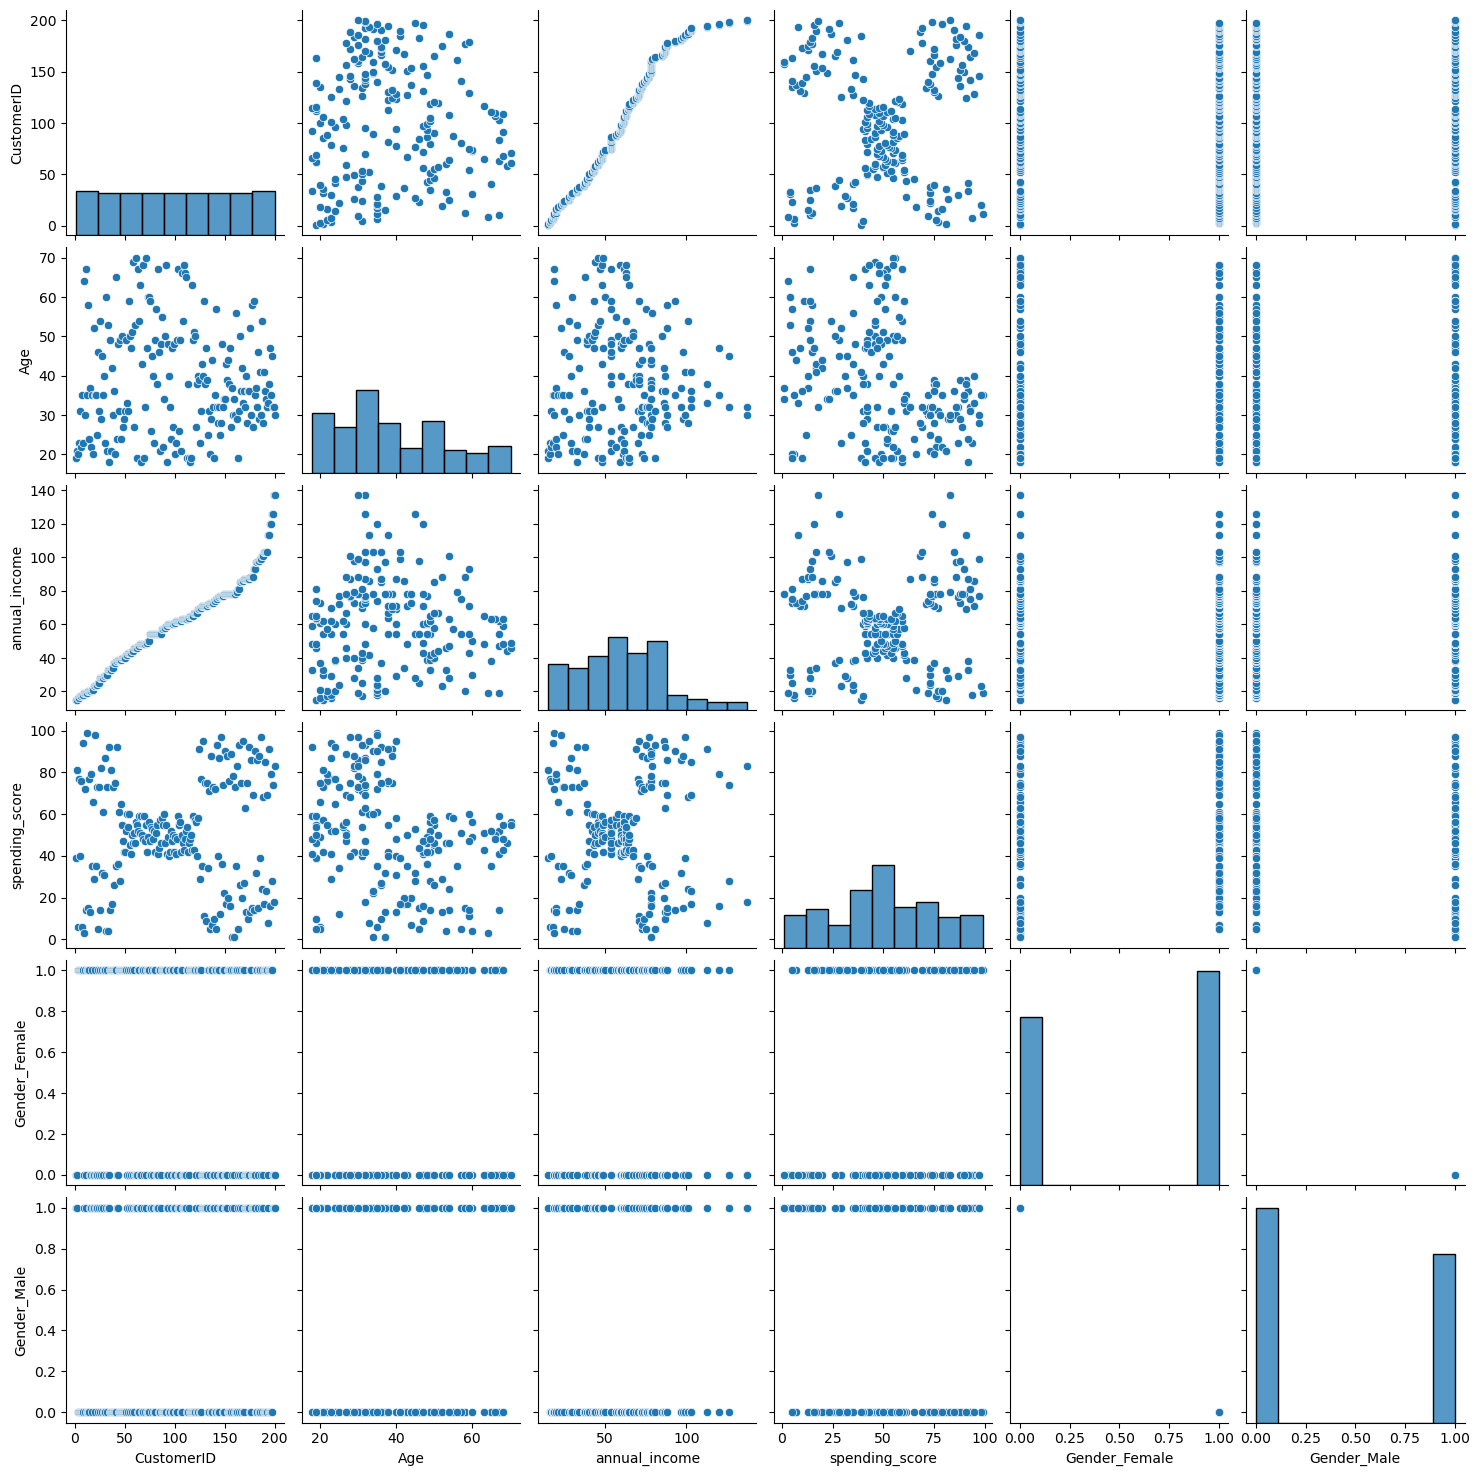

In [13]:
sns.pairplot(df)

pairplot shows annual_income and customerid are highly correlated,and if customerid in x-axis and spending_score in y-axis it shows presences of 5 clusters.

<AxesSubplot:>

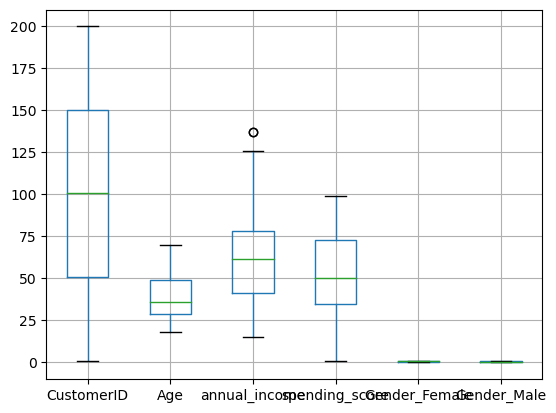

In [14]:
df.boxplot()

# Scaling of data

In [16]:
sc = StandardScaler()
x=sc.fit_transform(df)
x

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117,  1.27334719, -1.12815215,
         1.12815215]])

# Model Building

In [18]:
km = KMeans()
y = km.fit_predict(x)

In [19]:
y

array([2, 2, 4, 4, 4, 4, 0, 4, 3, 4, 3, 4, 0, 4, 2, 2, 4, 2, 3, 4, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 4, 3, 4, 3, 2, 0, 4, 0, 4, 0, 4, 0, 2, 3, 4,
       0, 4, 0, 4, 4, 4, 0, 2, 4, 3, 0, 3, 0, 3, 4, 3, 3, 2, 0, 0, 3, 2,
       0, 0, 2, 4, 3, 0, 0, 0, 3, 2, 0, 2, 4, 0, 3, 2, 3, 0, 4, 3, 0, 1,
       1, 0, 0, 2, 3, 0, 1, 2, 0, 1, 3, 2, 1, 0, 3, 2, 3, 1, 0, 3, 3, 3,
       3, 1, 1, 2, 1, 1, 0, 0, 0, 0, 6, 1, 1, 6, 1, 1, 7, 6, 7, 6, 7, 6,
       1, 1, 7, 1, 5, 6, 7, 1, 5, 6, 1, 1, 7, 6, 7, 1, 5, 6, 7, 6, 5, 1,
       5, 1, 7, 1, 7, 1, 5, 1, 7, 1, 7, 1, 7, 1, 5, 6, 7, 6, 7, 6, 5, 1,
       7, 6, 7, 6, 5, 1, 7, 1, 5, 6, 5, 6, 5, 1, 5, 1, 7, 1, 5, 1, 5, 6,
       7, 6])

In [20]:
km.cluster_centers_

array([[-0.5884235 ,  0.89190047, -0.52818008, -0.36794213,  0.88640526,
        -0.88640526],
       [ 0.71736668, -0.62915465,  0.63280673,  0.6392617 ,  0.88640526,
        -0.88640526],
       [-0.84582872, -0.94612419, -0.81180014,  0.34648243, -1.12815215,
         1.12815215],
       [-0.53936736,  1.43461613, -0.48704192, -0.35715836, -1.12815215,
         1.12815215],
       [-1.14628555, -0.86765928, -1.10233311,  0.50623315,  0.88640526,
        -0.88640526],
       [ 1.22111108,  0.41265847,  1.21277   , -1.11029664,  0.88640526,
        -0.88640526],
       [ 1.00232298, -0.42361233,  0.9730392 ,  1.20592027, -1.12815215,
         1.12815215],
       [ 1.02192275,  0.04664835,  0.93858626, -1.40339942, -1.12815215,
         1.12815215]])

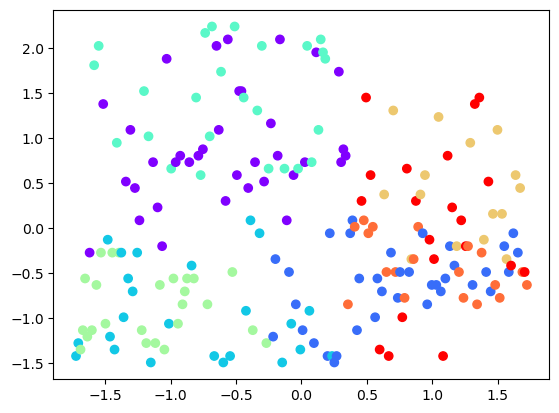

In [22]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

In [23]:
silhouette_score(x,y)

0.40010678712261855

elbow grapg

In [28]:
wcss=[]

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [29]:
wcss

[1200.0,
 797.2883426603587,
 638.6589248711803,
 510.5721751155941,
 435.3944349804206,
 369.21762091680915,
 304.88095800365477,
 254.63518778500878,
 222.7896918592445,
 191.9579589887413,
 170.1866701513118,
 152.5823368565355,
 140.411168278106,
 132.93664262676054,
 125.26738098076268,
 120.53928818695982,
 111.18609874665991,
 104.73373273933183,
 97.4827379962849]

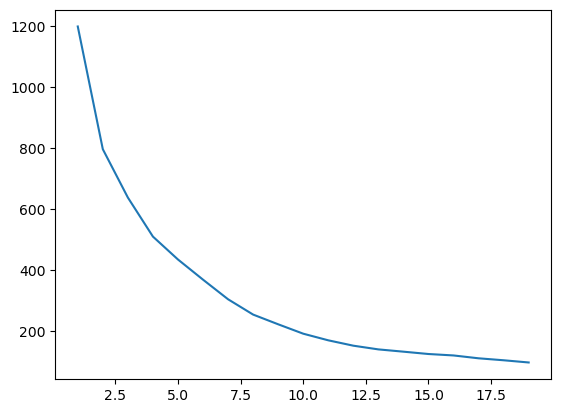

In [30]:
plt.plot(range(1,20),wcss)

In [31]:
km = KMeans(n_clusters=8)
ypred = km.fit_predict(x)
ypred

array([3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 4, 1, 3, 3, 1, 3, 0, 1, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 1, 0, 1, 0, 3, 4, 1, 4, 1, 1, 1, 4, 3, 0, 1,
       4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 0, 4, 0, 1, 0, 0, 3, 4, 4, 0, 3,
       4, 4, 3, 1, 0, 4, 4, 4, 0, 3, 4, 3, 1, 4, 0, 3, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 3, 0, 4, 1, 3, 4, 1, 0, 3, 1, 4, 0, 3, 0, 1, 4, 0, 0, 0,
       0, 1, 4, 3, 1, 1, 4, 4, 4, 4, 7, 2, 5, 7, 2, 5, 6, 7, 6, 7, 6, 7,
       2, 5, 6, 5, 2, 7, 6, 5, 2, 7, 2, 5, 6, 7, 6, 5, 2, 7, 6, 7, 2, 5,
       2, 5, 6, 5, 6, 5, 2, 5, 6, 5, 6, 5, 6, 5, 2, 7, 6, 7, 6, 7, 2, 5,
       6, 7, 6, 7, 2, 5, 6, 5, 2, 7, 2, 7, 2, 5, 2, 5, 6, 5, 2, 5, 2, 7,
       6, 7])

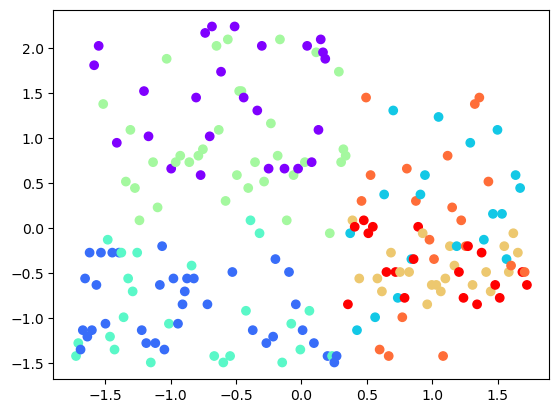

In [32]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')

In [33]:
km.cluster_centers_

array([[-0.53936736,  1.43461613, -0.48704192, -0.35715836, -1.12815215,
         1.12815215],
       [-0.86314944, -0.8843251 , -0.8282342 ,  0.26722174,  0.88640526,
        -0.88640526],
       [ 1.07434073,  0.16940716,  1.0433513 , -0.99464925,  0.88640526,
        -0.88640526],
       [-0.84582872, -0.94612419, -0.81180014,  0.34648243, -1.12815215,
         1.12815215],
       [-0.52234357,  0.92937863, -0.46741192, -0.31168167,  0.88640526,
        -0.88640526],
       [ 1.0565642 , -0.45245636,  0.94327069,  1.17982252,  0.88640526,
        -0.88640526],
       [ 1.02192275,  0.04664835,  0.93858626, -1.40339942, -1.12815215,
         1.12815215],
       [ 1.00232298, -0.42361233,  0.9730392 ,  1.20592027, -1.12815215,
         1.12815215]])

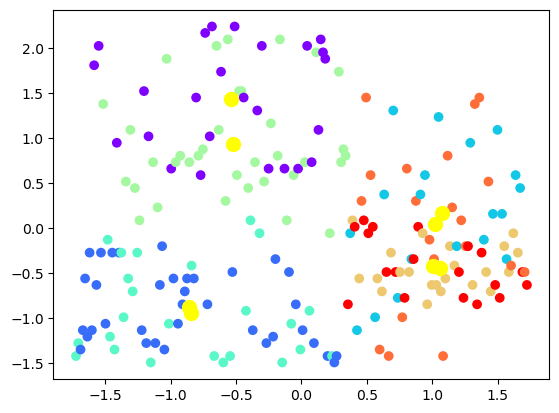

In [35]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [37]:
silhouette_score(x,ypred)

0.40781963654677156